In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/harshratna/2d-floor-plan-dataset-with-text-descriptions-new")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: syedosamaalishah092
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harshratna/2d-floor-plan-dataset-with-text-descriptions-new


100%|██████████| 16.1M/16.1M [00:00<00:00, 110MB/s] 

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
df = pd.read_pickle("/content/2d-floor-plan-dataset-with-text-descriptions-new/word_embeddings_dataframe.pkl")
df.head()

,File_Name,Text,Image_Path,BERT_Embeddings
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09..."
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1..."
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1..."
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02..."
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0..."


In [ ]:
def modify_image_path(image_path):
    filename = os.path.basename(image_path).split("floorplan_image\\")[1]
    new_path = os.path.join("human_annotated_images", filename)
    return new_path

df['Modified_Image_Path'] = df['Image_Path'].apply(modify_image_path)

df.head()

,File_Name,Text,Image_Path,BERT_Embeddings,Modified_Image_Path
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


In [ ]:
df.drop(['Image_Path'], axis = 1, inplace = True)

In [ ]:
df.rename(columns = {'Modified_Image_Path':'Image_Path'}, inplace = True)
df.head()

,File_Name,Text,BERT_Embeddings,Image_Path
0,10017,"The balcony juts out on the south side, with t...","[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...","[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...","[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


In [ ]:
import os
for dirname, _, filenames in os.walk('/content'):
    print(dirname)

/content
/content/.config
/content/.config/logs
/content/.config/logs/2024.12.11
/content/.config/configurations
/content/2d-floor-plan-dataset-with-text-descriptions-new
/content/2d-floor-plan-dataset-with-text-descriptions-new/human_annotated_images
/content/sample_data


In [ ]:
DIRECTORY = "/content/2d-floor-plan-dataset-with-text-descriptions-new/"

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

X_text_embeddings = np.array(df['BERT_Embeddings'].tolist())
image_paths = df['Image_Path'].tolist()

X_images = []
for path in image_paths:
    path = DIRECTORY + path
    image = Image.open(path)
    image_array = np.array(image) / 255.0
    X_images.append(image_array)

X_text_embeddings = np.array(X_text_embeddings)
X_images = np.array(X_images)

y = np.arange(len(df))

X_train_text, X_test_text, X_train_images, X_test_images, y_train, y_test = train_test_split(
    X_text_embeddings, X_images, y, test_size=0.2, random_state=42
)

print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)
print("y_train shape:", y_train.shape)
print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_test shape:", y_test.shape)

X_train_text shape: (3202, 1, 768)
X_train_images shape: (3202, 256, 256, 3)
y_train shape: (3202,)
X_test_text shape: (801, 1, 768)
X_test_images shape: (801, 256, 256, 3)
y_test shape: (801,)


In [ ]:
X_train_text = X_train_text.reshape(X_train_text.shape[0], -1)
X_test_text = X_test_text.reshape(X_test_text.shape[0], -1)

print("Reshaped X_train_text shape:", X_train_text.shape)
print("Reshaped X_test_text shape:", X_test_text.shape)

Reshaped X_train_text shape: (3202, 768)
Reshaped X_test_text shape: (801, 768)


In [ ]:
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)

print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)

X_train_text shape: (3202, 768)
X_train_images shape: (3202, 256, 256, 3)
X_test_text shape: (801, 768)
X_test_images shape: (801, 256, 256, 3)


In [ ]:
type(X_train_images)

numpy.ndarray

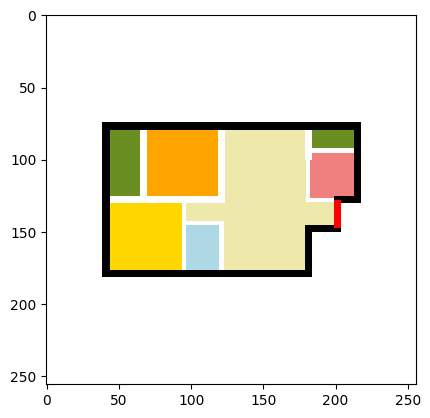

In [ ]:
data = X_train_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [ ]:
X_train_images.shape

(3202, 256, 256, 3)

In [ ]:
import cv2
resized_images = []

new_width = 64
new_height = 64

for image in X_train_images:
    resized_img = cv2.resize(image, (new_width, new_height))
    resized_images.append(resized_img)


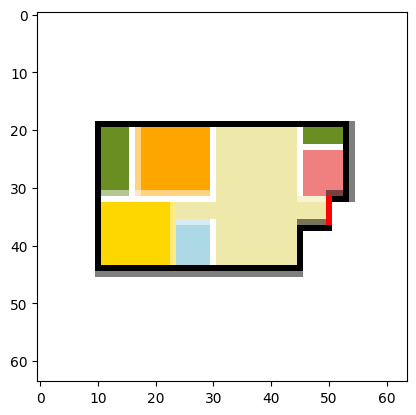

In [ ]:
data = resized_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [ ]:
X_train_images_resized = np.array(resized_images)

In [ ]:
print(X_train_images_resized.shape)
print(X_train_text.shape)

(3202, 64, 64, 3)
(3202, 768)


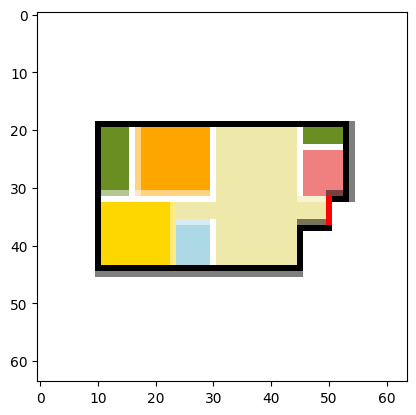

In [ ]:
data = X_train_images_resized[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [ ]:
print(X_train_images_resized.shape)
print(X_train_text.shape)

(3202, 64, 64, 3)
(3202, 768)


In [ ]:
train_images = X_train_images_resized[:500]
train_text = X_train_text[:500]

In [ ]:
print(train_images.shape)
print(train_text.shape)

(500, 64, 64, 3)
(500, 768)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_generator(embedding_size):
    model = models.Sequential()

    # Dense layer
    model.add(layers.Dense(8192, input_shape=(embedding_size,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Reshape layer
    model.add(layers.Reshape((4, 4, 512)))

    # Transposed convolutional layers
    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))

    return model

generator = build_generator(embedding_size=768)
generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8192)                │       6,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8192)                │          32,768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 256)           │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 64)          │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 3)           │           4,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,640,259 (40.59 MB)

 Trainable params: 10,622,979 (40.52 MB)

 Non-trainable params: 17,280 (67.50 KB)

In [ ]:
def build_discriminator():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,314,753 (16.46 MB)

 Trainable params: 4,314,753 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
d_losses = []
g_losses = []

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

generator = build_generator(embedding_size=768)
discriminator = build_discriminator()

class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_function):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_function = loss_function

    def train_step(self, data):
        real_images = data[0]
        embeddings = data[1]
        batch_size = tf.shape(real_images)[0]

        # Combine embeddings with noise
        generator_input = embeddings

        # Training the discriminator
        with tf.GradientTape() as disc_tape:
            generated_images = self.generator(generator_input, training=True)

            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(generated_images, training=True)

            disc_loss = self.loss_function(tf.ones_like(real_output), real_output) + \
                        self.loss_function(tf.zeros_like(fake_output), fake_output)
            d_losses.append(disc_loss)

        # Gradient update for discriminator
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        # Training the generator
        with tf.GradientTape() as gen_tape:
            generated_images = self.generator(generator_input, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            gen_loss = self.loss_function(tf.ones_like(fake_output), fake_output)
            g_losses.append(gen_loss)

        # Gradient update for generator
        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))


        return {'d_loss': disc_loss, 'g_loss': gen_loss}

# Instantiate the GAN model
gan = GAN(generator=generator, discriminator=discriminator)

gan.compile(
    g_optimizer=optimizers.Adam(1e-4),
    d_optimizer=optimizers.Adam(1e-4),
    loss_function=losses.BinaryCrossentropy()
)


In [ ]:
import tensorflow as tf

batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_text))
train_dataset = train_dataset.shuffle(buffer_size=500).batch(batch_size)

print(train_dataset.element_spec)

(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 768), dtype=tf.float32, name=None))


In [ ]:
hist = gan.fit(train_dataset, epochs=1000)
gan.save('text-to-architecture.h5')

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 527ms/step - d_loss: 0.4666 - g_loss: 2.5876
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - d_loss: 0.0216 - g_loss: 5.8942
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.6933 - g_loss: 5.7375
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.1316 - g_loss: 5.0009
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.3063 - g_loss: 6.2186
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.1017 - g_loss: 6.4124
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.1366 - g_loss: 4.8939
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.8352 - g_loss: 4.0258
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.2256 - g_loss: 4.8235
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.2419 - g_loss: 2.7044
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - d_loss: 0.5198 - g_loss: 2.5813
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━

Shape of random text embeddings: (16, 768)


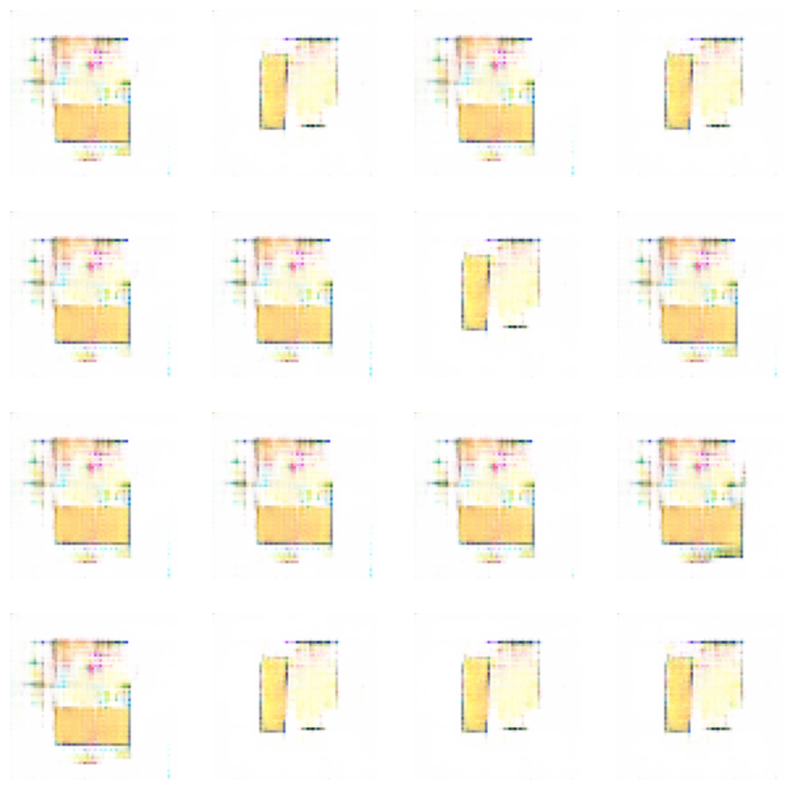

In [33]:
import matplotlib.pyplot as plt

import numpy as np

num_embeddings = 16
random_indices = np.random.choice(train_text.shape[0], size=num_embeddings, replace=False)
random_text_embeddings = train_text[random_indices]
print("Shape of random text embeddings:", random_text_embeddings.shape)


generator_input = random_text_embeddings
generated_images = generator(random_text_embeddings, training=False)

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow((generated_images[i] + 1) / 2)
    plt.axis('off')
plt.show()